## Background substraction

### Objetivo del TP
- Implementar el detector de fondo naive usando la mediana como estimador. El algoritmo debe recibir el parámetro N (cantidad de frames utilizados para la estimación) y el intervalo de tiempo para recalcular el fondo
- Se deben generar las mascaras de foreground y aplicarlas a los frames para segmentar los objetos en movimiento
- Comparar con alguno de los métodos vistos en la practica basados en mezcla de gaussianas

#### Objetivo de la notebook
- Realizar pruebas para validar el resultado del algoritmo implementado

In [1]:
import cv2 as cv
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Código con la clase que imlementa el detector de fondo Naive
import naive_background_substraction as naive

### Pruebas con el video vtest.avi

In [2]:
# Abrimos el archivo
filename = 'videos/vtest.avi'
capture = cv.VideoCapture(filename)
frame_count = capture.get(7)
if frame_count == 0:
    print('Falla al abrir el archivo: ' + filename)

### Creación de un estimador Naive

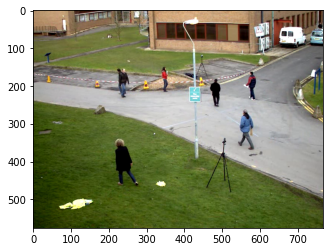

In [3]:
# Crea un estimador Naive con un background basado en 10 frames aleatorios
naive_bg = naive.naiveBackgroundSubstraction(capture, N=10)

# Muestro el background inicial
bg = naive_bg.background()
plt.imshow(cv.cvtColor(bg, cv.COLOR_BGR2RGB)); plt.show()

### Actualización del background

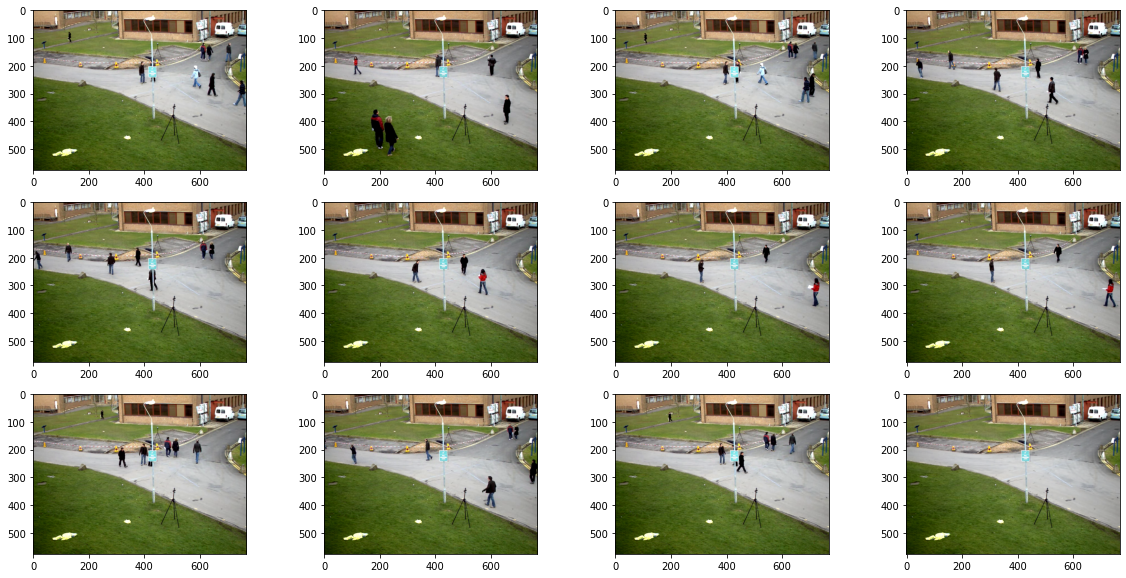

In [4]:
fig = plt.figure(figsize=[20, 10]); i=0

# Actualizo el background con nuevos framess tomados aleatoriamente
for f in np.random.randint(0,frame_count, 12): 
    capture.set(cv.CAP_PROP_POS_FRAMES,f)
    ret, frame = capture.read()
    plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    naive_bg.update_background(frame)
    bg = naive_bg.background()
    i=i+1;plt.subplot(3,4,i);plt.imshow(cv.cvtColor(bg, cv.COLOR_BGR2RGB))
plt.show()


### Cómputo de la foreground mask 

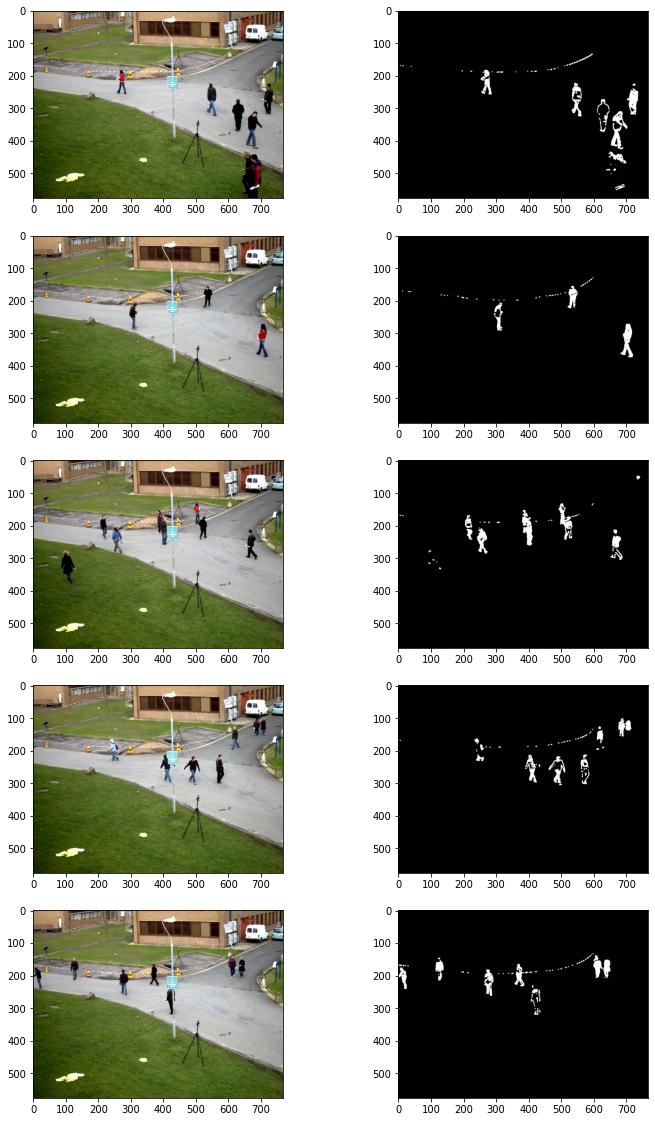

In [5]:
fig = plt.figure(figsize=[12,20]); i=0

# Cómputo sobre frames aleatorios, usando el último background calculado
for f in np.random.randint(0,frame_count, 5): 
    capture.set(cv.CAP_PROP_POS_FRAMES,f)
    ret, frame = capture.read()
    mask = naive_bg.apply(frame)
    i=i+1;plt.subplot(5,2,i);plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    i=i+1;plt.subplot(5,2,i);plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
